# Long Short Term Memory

- Simple RNN의 단점

    - Timestep이 커질수록 학습 능력이 떨어진다.
    
    - 이를 Long-Term Dependency 문제라고 하며, 입력 데이터와 출력 사이의 길이가 길어질 수록 연관관계가 적어진다.
    
    - 적 과거 시점이 현재와 너무 멀어지면 어려워 진다는 것.
    
- 1997년 Sepp Hochreiter(셉 호흐라이터)와 Jurgren Schmidhuber(유르겐 슈미트후버)에 의해 제안되었다.

- RNN에 비해서 복잡한 구조를 가지고 있다.

    - 출력 외에도 LSTM 셀 사이에서만 공유되는 Cell State를 가지고 있다.
    
    - Simple RNN은 한 Timestep에서 입력 x와 이전 Timestep의 출력 h를 concatenate 하고, tanh를 통과하여 다음 h를 구했다.
    
    - LSTM의 구조는 아래와 같다.
    
![LSTM](https://lh3.googleusercontent.com/proxy/oopHDsNG1N3sKgxsfv-NNHvw8wtId3oGjPJBi6gWKvO-p0nojhdQHWAumNy0b0iXUOtzpMKAiciXs6tRQEn3hOL_YJrO7c4Ok_-mdAhxOMRUcfz_1iCiESaV-2pkOpZKBFczUaNviJoRRcHPNTfwqxaI32qdSA8I5HHWGJfv9Np3pSdCVj_JC8YLnUg0f8eMDUhxUk4hdi6RhnvyOwfPx6xXAurLK3pXF6R5FX4FQyUeb6moCGwQfAFeLQSdNe9USbaEFbI2ixUdDVs46lkFdz2XorR6eD3_1BCiiCkFm5-C_U2H)

- 출력 h와 별개로 Cell State인 c가 함께 전달된다.

- 이는 Timestep을 가로지르며 Cell State를 보존하기 때문에, Long-Term Dependency 문제를 해결할 수 있다.

- 또한, tanh 외에 Sigmoid가 사용된다.

    - Sigmoid는 항상 0 ~ 1의 출력을 낸다.
    
- LSTM의 수식은 아래와 같다.

![LSTM2](https://www.researchgate.net/profile/Savvas_Varsamopoulos/publication/329362532/figure/fig5/AS:699592479870977@1543807253596/Structure-of-the-LSTM-cell-and-equations-that-describe-the-gates-of-an-LSTM-cell.jpg)

- U와 W는 Weight를 의미한다.

- i는 Input, f는 Forget, o는 Output Gate를 의미한다.

In [1]:
import numpy as np
X = []
Y = []

for i in range(3000):
    lst = np.random.rand(100)
    
    # 마킹할 숫자 2개의 index를 뽑는다.
    idx = np.random.choice(100, 2, replace=False)
    
    # 마킹 인덱스가 저장된 One-Hot Encoding Vector를 만든다.
    zeros = np.zeros(100)
    zeros[idx] = 1
    
    X.append(np.array(list(zip(zeros, lst))))
    Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

[[0.         0.69657182]
 [0.         0.79079622]
 [0.         0.92700457]
 [0.         0.8834778 ]
 [0.         0.09528795]
 [0.         0.57594087]
 [0.         0.28298292]
 [0.         0.14491935]
 [0.         0.73755642]
 [0.         0.75074915]
 [0.         0.09356288]
 [0.         0.36052908]
 [0.         0.57698809]
 [0.         0.70949312]
 [0.         0.56894672]
 [0.         0.33148456]
 [0.         0.41871733]
 [0.         0.46748911]
 [0.         0.55929239]
 [0.         0.45710433]
 [0.         0.28984979]
 [0.         0.2027458 ]
 [0.         0.89839624]
 [0.         0.21671561]
 [0.         0.74801859]
 [0.         0.42412811]
 [0.         0.52181825]
 [0.         0.07306497]
 [0.         0.3061248 ]
 [0.         0.34303088]
 [0.         0.93879668]
 [0.         0.41769734]
 [0.         0.44436255]
 [0.         0.34501926]
 [0.         0.06220184]
 [0.         0.40342406]
 [0.         0.78095573]
 [0.         0.44558693]
 [0.         0.21892286]
 [0.         0.32310054]


In [2]:
import tensorflow as tf

In [3]:
# RNN을 겹치기 위해서 return_sequences를 True로 설정함.
# 이걸 True로 하면 첫 번째 Layer는 두 번째 Layer로 값을 전달하게 됨.
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100, 2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [4]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.1124 - val_loss: 0.0556
Epoch 2/100
2048/2048 [==============================] - 2s 956us/sample - loss: 0.0536 - val_loss: 0.0506
Epoch 3/100
2048/2048 [==============================] - 2s 964us/sample - loss: 0.0511 - val_loss: 0.0502
Epoch 4/100
2048/2048 [==============================] - 2s 960us/sample - loss: 0.0503 - val_loss: 0.0500
Epoch 5/100
2048/2048 [==============================] - 2s 952us/sample - loss: 0.0509 - val_loss: 0.0496
Epoch 6/100
2048/2048 [==============================] - 2s 945us/sample - loss: 0.0508 - val_loss: 0.0544
Epoch 7/100
2048/2048 [==============================] - 2s 941us/sample - loss: 0.0495 - val_loss: 0.0487
Epoch 8/100
2048/2048 [==============================] - 2s 955us/sample - loss: 0.0486 - val_loss: 0.0529
Epoch 9/100
2048/2048 [==============================] - 2s 941us/sample - loss: 0.0495 - val_loss:

2048/2048 [==============================] - 2s 959us/sample - loss: 0.0319 - val_loss: 0.0537
Epoch 77/100
2048/2048 [==============================] - 2s 956us/sample - loss: 0.0298 - val_loss: 0.0559
Epoch 78/100
2048/2048 [==============================] - 2s 950us/sample - loss: 0.0303 - val_loss: 0.0538
Epoch 79/100
2048/2048 [==============================] - 2s 947us/sample - loss: 0.0302 - val_loss: 0.0534
Epoch 80/100
2048/2048 [==============================] - 2s 945us/sample - loss: 0.0298 - val_loss: 0.0555
Epoch 81/100
2048/2048 [==============================] - ETA: 0s - loss: 0.030 - 2s 952us/sample - loss: 0.0304 - val_loss: 0.0568
Epoch 82/100
2048/2048 [==============================] - 2s 949us/sample - loss: 0.0288 - val_loss: 0.0568
Epoch 83/100
2048/2048 [==============================] - 2s 953us/sample - loss: 0.0289 - val_loss: 0.0569
Epoch 84/100
2048/2048 [==============================] - 2s 956us/sample - loss: 0.0281 - val_loss: 0.0559
Epoch 85/100
2048

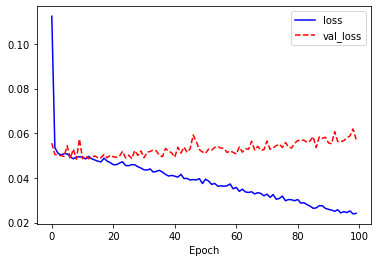

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [7]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])

for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness: ', (440 - fail) / 440 * 100, '%')

440/440 [==============================] - 0s 477us/sample - loss: 0.0623
0.05268099576197185 	 0.21365017 	diff: 0.16096917122640095
0.42519762466881783 	 0.2755152 	diff: 0.14968242596123726
0.07113537658691868 	 -0.0036005497 	diff: 0.07473592623822853
0.3954028068988775 	 0.2878419 	diff: 0.10756092061691036
0.19959497720499908 	 0.39045694 	diff: 0.1908619674990567
correctness:  15.227272727272728 %


### Simple RNN으로는 아주 낮은 정확도를 볼 수 있다.

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100, 2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 30)           3960      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [20]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 5s 2ms/sample - loss: 0.0494 - val_loss: 0.0534
Epoch 2/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0490 - val_loss: 0.0489
Epoch 3/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0490 - val_loss: 0.0499
Epoch 4/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0488 - val_loss: 0.0500
Epoch 5/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.0491 - val_loss: 0.0482
Epoch 6/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0487 - val_loss: 0.0483
Epoch 7/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0486 - val_loss: 0.0482
Epoch 8/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.0486 - val_loss: 0.0482
Epoch 9/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.0488 - val_loss: 0.0486
Epoch 10

Epoch 77/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 4.7649e-04 - val_loss: 5.2914e-04
Epoch 78/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 4.5021e-04 - val_loss: 4.7337e-04
Epoch 79/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 5.2454e-04 - val_loss: 3.6740e-04
Epoch 80/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 5.0026e-04 - val_loss: 8.3741e-04
Epoch 81/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 4.4271e-04 - val_loss: 2.9463e-04
Epoch 82/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 3.4938e-04 - val_loss: 3.0263e-04
Epoch 83/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 3.1338e-04 - val_loss: 4.1667e-04
Epoch 84/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 3.6834e-04 - val_loss: 2.9795e-04
Epoch 85/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 3.6254e-

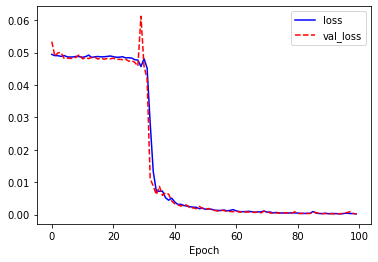

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [22]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])

for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness: ', (440 - fail) / 440 * 100, '%')

440/440 [==============================] - 0s 1ms/sample - loss: 1.8877e-04
0.05268099576197185 	 0.04518909 	diff: 0.007491905688863175
0.42519762466881783 	 0.4241078 	diff: 0.0010898346755316979
0.07113537658691868 	 0.07063613 	diff: 0.0004992457175301002
0.3954028068988775 	 0.39992362 	diff: 0.004520815709307291
0.19959497720499908 	 0.19113487 	diff: 0.008460107152661434
correctness:  98.18181818181819 %
